# Import and subset Gender-Science IAT data

In [31]:
import pandas 
genderiat = pandas.read_csv('gendersciiatdat.csv')

,implicit,explicit,raceomb,politics,year,age,education
count,8000.000000,8000.000000,7635.000000,7551.000000,8000.000000,7690.000000,7612.000000
mean,0.342257,4.807500,5.850950,4.704940,2011.599375,27.307802,6.189175
std,0.400191,0.860072,1.343845,1.626299,2.690219,11.650358,2.118038
min,-1.788986,1.000000,1.000000,1.000000,2007.000000,7.000000,1.000000
25%,0.077417,4.000000,6.000000,4.000000,2009.000000,19.000000,5.000000
50%,0.369378,4.500000,6.000000,5.000000,2012.000000,23.000000,6.000000
75%,0.632541,5.500000,6.000000,6.000000,2014.000000,32.000000,8.000000
max,1.518473,7.000000,9.000000,7.000000,2015.000000,80.000000,10.000000


# Plot Gender-Science IAT data

Text(0.5,0,'Participant age')

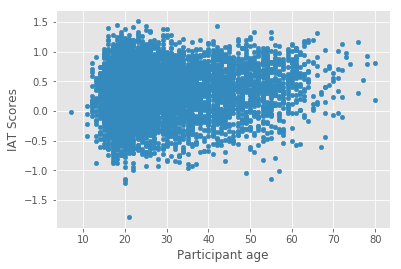

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

# Scatter iat by age
genderiat.plot(kind='scatter', x='age', y='implicit') 
plt.ylabel('IAT Scores')
plt.xlabel('Participant age')

year
2007    0.401543
2008    0.360631
2009    0.358527
2010    0.363791
2011    0.341492
2012    0.358293
2013    0.324923
2014    0.317224
2015    0.307418
Name: implicit, dtype: float64


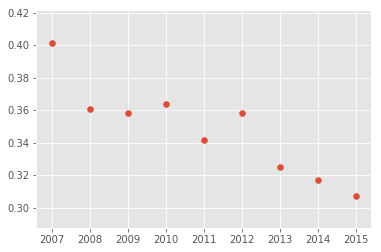

In [134]:
print(genderiat.groupby('year')['implicit'].mean()) # get average iat score each year
    # saved as Series of iat scores; does not save year as a column
# plot yearwise iat scores averages by year
plt.scatter([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], genderiat.groupby('year')['implicit'].mean())

(array([1.000e+00, 4.000e+00, 2.600e+01, 1.950e+02, 7.560e+02, 1.752e+03,
        2.537e+03, 1.998e+03, 6.740e+02, 5.700e+01]),
 array([-1.78898611, -1.45824019, -1.12749428, -0.79674836, -0.46600244,
        -0.13525652,  0.1954894 ,  0.52623531,  0.85698123,  1.18772715,
         1.51847307]),
 <a list of 10 Patch objects>)

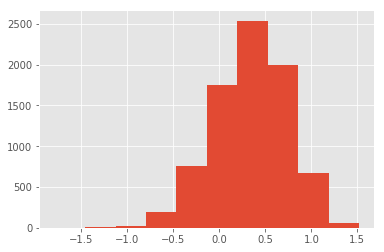

In [12]:
plt.hist(genderiat['implicit'])  # histogram of IAT scores

f    5303
m    2398
.     299
Name: sex, dtype: int64

(0, 0.6)

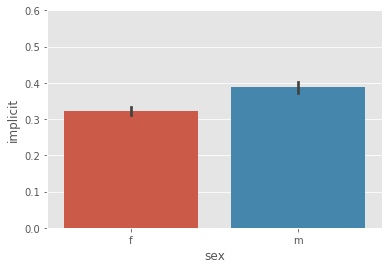

In [33]:
# looks like some gender responses are "."; consider to be missing and remove
genderiat['sex'].value_counts()
genderiat.drop(genderiat[genderiat.sex == "."].index, inplace=True)

# barplot of iat scores by gender
import seaborn as sns
sns.barplot(x='sex', y='implicit', data=genderiat)
plt.ylim(0, .6)